# Chapter 13: Missing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Read in a missing version of the Chicago Insurance data:

In [2]:
chmiss = pd.read_csv("data/chmiss.csv", index_col=0)
chmiss.head()

,race,fire,theft,age,involact,income
60626,10.0,6.2,29.0,60.4,NaN,11.744
60640,22.2,9.5,44.0,76.5,0.1,9.323
60613,19.6,10.5,36.0,NaN,1.2,9.948
60657,17.3,7.7,37.0,NaN,0.5,10.656
60614,24.5,8.6,53.0,81.4,0.7,9.730


Describe does give observed count but can only tell the number of missing by subtraction

In [3]:
chmiss.describe().round(2)

,race,fire,theft,age,involact,income
count,43.00,45.00,43.00,42.00,44.00,45.00
mean,35.61,11.42,32.65,59.97,0.65,10.74
std,33.26,8.36,23.12,23.62,0.64,2.79
min,1.00,2.00,3.00,2.00,0.00,5.58
25%,3.75,5.60,22.00,48.30,0.00,8.56
50%,24.50,9.50,29.00,64.40,0.50,10.69
75%,57.65,15.10,38.00,78.25,0.92,12.10
max,99.70,36.20,147.00,90.10,2.20,21.48


Number of missing values per variable

In [4]:
chmiss.isna().sum(axis=0)

race        4
fire        2
theft       4
age         5
involact    3
income      2
dtype: int64

Number of missing values per case

In [5]:
chmiss.isna().sum(axis=1)

60626    1
60640    0
60613    1
60657    1
60614    0
60610    0
60611    0
60625    0
60618    1
60647    1
60622    0
60631    0
60646    1
60656    0
60630    0
60634    1
60641    0
60635    0
60639    0
60651    1
60644    1
60624    0
60612    0
60607    1
60623    0
60608    1
60616    1
60632    0
60609    1
60653    0
60615    0
60638    0
60629    1
60636    0
60621    1
60637    0
60652    0
60620    1
60619    0
60649    1
60617    1
60655    0
60643    0
60628    1
60627    0
60633    0
60645    1
dtype: int64

Make a plot of the missing data:

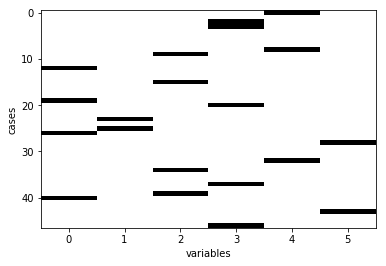

In [6]:
plt.imshow(~chmiss.isna(), aspect='auto')
plt.xlabel("variables")
plt.ylabel("cases")
plt.gray()
plt.show()

Full data model

In [7]:
chredlin = pd.read_csv("data/chredlin.csv", index_col=0)
lmod = smf.ols(formula='involact ~ race + fire + theft + age + np.log(income)', data=chredlin).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               involact   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     24.83
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           2.01e-11
Time:                        16:00:51   Log-Likelihood:                -12.014
No. Observations:                  47   AIC:                             36.03
Df Residuals:                      41   BIC:                             47.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1855      1.100     -1.078      0.288      -3.408       1.036
race               0.0095      0.002      3.817      0.000       0.004       0.015
fire               0.0399      0.009      4.547      0.000       0.022       0.058
theft             -0.0103      0.003     -3.653      0.001      -0.016      -0.005
age                0.0083      0.003      3.038      0.004       0.003       0.014
np.log(income)     0.3458      0.400      0.864      0.393      -0.462       1.154
==============================================================================
Omnibus:                        2.243   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.355
Skew:                           0.170   Prob(JB):                        0.508
Kurtosis:                       3.759   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Missing data model

In [8]:
lmodm = smf.ols(formula='involact ~ race + fire + theft + age + np.log(income)', data=chmiss).fit()
lmodm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               involact   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     15.79
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           1.69e-06
Time:                        16:00:51   Log-Likelihood:                -5.7253
No. Observations:                  27   AIC:                             23.45
Df Residuals:                      21   BIC:                             31.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.4072      1.419     -1.696      0.105      -5.359       0.544
race               0.0111      0.003      3.232      0.004       0.004       0.018
fire               0.0450      0.011      4.208      0.000       0.023       0.067
theft             -0.0161      0.006     -2.894      0.009      -0.028      -0.005
age                0.0091      0.003      2.652      0.015       0.002       0.016
np.log(income)     0.8443      0.532      1.588      0.127      -0.261       1.950
==============================================================================
Omnibus:                        1.216   Durbin-Watson:                   2.453
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.935
Skew:                           0.441   Prob(JB):                        0.626
Kurtosis:                       2.768   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean values for the variables

In [9]:
cmeans = chmiss.mean(axis=0)
cmeans

race        35.609302
fire        11.424444
theft       32.651163
age         59.969048
involact     0.647727
income      10.735867
dtype: float64

Fill in missing values with means

In [10]:
mchm = chmiss.copy()
mchm.race.fillna(cmeans['race'],inplace=True)
mchm.fire.fillna(cmeans['fire'],inplace=True)
mchm.theft.fillna(cmeans['theft'],inplace=True)
mchm.age.fillna(cmeans['age'],inplace=True)
mchm.income.fillna(cmeans['income'],inplace=True)
imod = smf.ols(formula='involact ~ race + fire + theft + age + np.log(income)', data=mchm).fit()
imod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               involact   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     16.25
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           1.46e-08
Time:                        16:00:52   Log-Likelihood:                -17.153
No. Observations:                  44   AIC:                             46.31
Df Residuals:                      38   BIC:                             57.01
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5296      1.088      0.487      0.629      -1.673       2.732
race               0.0070      0.003      2.452      0.019       0.001       0.013
fire               0.0282      0.010      2.956      0.005       0.009       0.048
theft             -0.0033      0.003     -1.206      0.235      -0.009       0.002
age                0.0062      0.003      1.976      0.055      -0.000       0.013
np.log(income)    -0.3158      0.390     -0.809      0.423      -1.106       0.474
==============================================================================
Omnibus:                        1.687   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                0.817
Skew:                          -0.219   Prob(JB):                        0.665
Kurtosis:                       3.504   Cond. No.                     1.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
lmodr = smf.ols(formula='race ~ fire + theft + age + np.log(income)', data=chmiss).fit()
mv = chmiss.race.isna()
lmodr.predict(chmiss)[mv]

60646   -15.945180
60651    21.418063
60616    72.607239
60617    27.977170
dtype: float64

In [12]:
chmiss.race.fillna(lmodr.predict(chmiss))[mv]

60646   -15.945180
60651    21.418063
60616    72.607239
60617    27.977170
Name: race, dtype: float64

Use logit transformation to restrict to [0,1]

In [13]:
def logit(x): return(np.log(x/(1-x)))

In [14]:
def ilogit(x): return(np.exp(x)/(1+np.exp(x)))

In [15]:
ilogit(0)

0.5

In [16]:
lmodr = smf.ols(formula='logit(race/100) ~ fire + theft + age + np.log(income)', data=chmiss).fit()
(ilogit(lmodr.predict(chmiss))*100)[mv]

60646     0.456738
60651    10.142346
60616    87.219223
60617    15.781989
dtype: float64

## Multiple imputation

`statsmodels` has *Multiple Imputation with Chained Equations* (MICE). Not the same as the R package demonstrated in R.

In [17]:
import statsmodels.imputation.mice as smi
imp = smi.MICEData(chmiss)
fm = 'involact ~ race + fire + theft + age + np.log(income)'
mmod = smi.MICE(fm, sm.OLS, imp)
results = mmod.fit(10, 10)
print(results.summary())

/anaconda/lib/python3.7/site-packages/statsmodels/imputation/mice.py:1081: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ix = dxi[[jj, ir]]
/anaconda/lib/python3.7/site-packages/statsmodels/imputation/mice.py:1082: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  iz = ixm[[jj, ix]]


                           Results: MICE
Method:                   MICE           Sample size:           47  
Model:                    OLS            Scale                  0.14
Dependent variable:       involact       Num. imputations       10  
--------------------------------------------------------------------
                Coef.  Std.Err.    t    P>|t|   [0.025 0.975]  FMI  
--------------------------------------------------------------------
Intercept       0.3683   1.1077  0.3324 0.7396 -1.8029 2.5394 0.0951
race            0.0065   0.0028  2.3143 0.0207  0.0010 0.0121 0.1278
fire            0.0298   0.0095  3.1244 0.0018  0.0111 0.0485 0.0647
theft          -0.0040   0.0032 -1.2302 0.2186 -0.0104 0.0024 0.3419
age             0.0065   0.0030  2.1501 0.0315  0.0006 0.0124 0.0976
np.log(income) -0.2476   0.4021 -0.6158 0.5381 -1.0358 0.5406 0.1059



As might be expected, the inference is not as sharp as seen in the full data version with somewhat larger p-values.

In [18]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, patsy, statsmodels

Software,Version
Python,3.7.0 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython,6.5.0
OS,Darwin 17.7.0 x86_64 i386 64bit
pandas,0.23.4
numpy,1.15.1
matplotlib,2.2.3
seaborn,0.9.0
scipy,1.1.0
patsy,0.5.0
statsmodels,0.9.0
